In [32]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformer_multiclass import TransformerModel
from torch.optim import Adam
from torch.utils.data import random_split
import matplotlib.pyplot as plt
from tqdm import tqdm 
import pandas as pd

train should be a tensor with a shape of [seq_len_train, batch_size_train].
seq_len_train should be consistent across all sequences in the training data.
batch_size_train is the number of sequences in each training batch.

val should be a tensor with a shape of [seq_len_val, batch_size_val].
seq_len_val should be consistent across all sequences in the validation data.
batch_size_val is the number of sequences in each validation batch.

In [33]:
class SyntheticDataset(Dataset):
    def __init__(self, num_sequences, sequence_length, vocab_size, num_classes=5):
        self.num_sequences = num_sequences
        self.sequence_length = sequence_length
        self.vocab_size = vocab_size
        self.num_classes = num_classes

        # Divide the vocabulary into num_classes bins
        self.class_bins = torch.linspace(0, vocab_size, num_classes + 1, dtype=torch.int)

        # Generate random token indices
        self.data = torch.randint(0, vocab_size, (num_sequences, sequence_length))

    def __len__(self):
        return self.num_sequences

    def __getitem__(self, idx):
        # Get input sequence
        input_sequence = self.data[idx]

        # Map token indices to class labels
        class_labels = torch.zeros_like(input_sequence)
        for i in range(self.num_classes):
            class_labels[(input_sequence >= self.class_bins[i]) & (input_sequence < self.class_bins[i+1])] = i

        return input_sequence, class_labels

In [34]:
# Define parameters
num_sequences = 1000
sequence_length = 20
vocab_size = 100
num_classes = 5

# Create synthetic dataset with reduced number of classes
dataset = SyntheticDataset(num_sequences, sequence_length, vocab_size, num_classes)


In [35]:
# Define the ratio for splitting the dataset (e.g., 80% train, 20% validation)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

# Split the dataset into training and validation sets
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create DataLoader for training and validation
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

In [36]:
# Print one batch and its shape for the training loader
for batch_idx, (inputs, targets) in enumerate(train_loader):
    print("Training batch:")
    print("Input shape:", inputs.shape)
    print("Target shape:", targets.shape)
    break  # Stop after printing the first batch

# Print one batch and its shape for the validation loader
for batch_idx, (inputs, targets) in enumerate(val_loader):
    print("Validation batch:")
    print("Input shape:", inputs.shape)
    print("Target shape:", targets.shape)
    break  # Stop after printing the first batch

Training batch:
Input shape: torch.Size([32, 20])
Target shape: torch.Size([32, 20])
Validation batch:
Input shape: torch.Size([32, 20])
Target shape: torch.Size([32, 20])


In [37]:
# Step 1: Initialize the model
# Assuming you have defined the TransformerModel class already
ntoken = vocab_size  # Assuming the vocabulary size matches the synthetic data
d_model = 128  # Example dimension for the model
nhead = 4  # Example number of attention heads
d_hid = 256  # Example dimension for the feedforward network
nlayers = 3  # Example number of layers
dropout = 0.2  # Example dropout probability

model = TransformerModel(ntoken, d_model, nhead, d_hid, nlayers, dropout)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [38]:
# Step 2: Define Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.001)

Validation - Epoch 1/10: 100%|██████████| 7/7 [00:00<00:00, 71.51batch/s]


Epoch [1/10], Train Loss: 1.8104, Val Loss: 0.4068, Train Acc: 9.1025, Val Acc: 19.8100


Validation - Epoch 2/10: 100%|██████████| 7/7 [00:00<00:00, 38.85batch/s]


Epoch [2/10], Train Loss: 0.1443, Val Loss: 0.0053, Train Acc: 19.7838, Val Acc: 20.0000


Validation - Epoch 3/10: 100%|██████████| 7/7 [00:00<00:00, 62.74batch/s]


Epoch [3/10], Train Loss: 0.0077, Val Loss: 0.0024, Train Acc: 19.9988, Val Acc: 20.0000


Validation - Epoch 4/10: 100%|██████████| 7/7 [00:00<00:00, 67.64batch/s]


Epoch [4/10], Train Loss: 0.0045, Val Loss: 0.0018, Train Acc: 20.0000, Val Acc: 20.0000


Validation - Epoch 5/10: 100%|██████████| 7/7 [00:00<00:00, 53.95batch/s]


Epoch [5/10], Train Loss: 0.0036, Val Loss: 0.0015, Train Acc: 20.0000, Val Acc: 20.0000


Validation - Epoch 6/10: 100%|██████████| 7/7 [00:00<00:00, 59.00batch/s]


Epoch [6/10], Train Loss: 0.0030, Val Loss: 0.0012, Train Acc: 20.0000, Val Acc: 20.0000


Validation - Epoch 7/10: 100%|██████████| 7/7 [00:00<00:00, 67.20batch/s]


Epoch [7/10], Train Loss: 0.0026, Val Loss: 0.0011, Train Acc: 20.0000, Val Acc: 20.0000


Validation - Epoch 8/10: 100%|██████████| 7/7 [00:00<00:00, 68.21batch/s]


Epoch [8/10], Train Loss: 0.0022, Val Loss: 0.0009, Train Acc: 20.0000, Val Acc: 20.0000


Validation - Epoch 9/10: 100%|██████████| 7/7 [00:00<00:00, 69.33batch/s]


Epoch [9/10], Train Loss: 0.0019, Val Loss: 0.0008, Train Acc: 20.0000, Val Acc: 20.0000


Validation - Epoch 10/10: 100%|██████████| 7/7 [00:00<00:00, 67.74batch/s]


Epoch [10/10], Train Loss: 0.0017, Val Loss: 0.0007, Train Acc: 20.0000, Val Acc: 20.0000


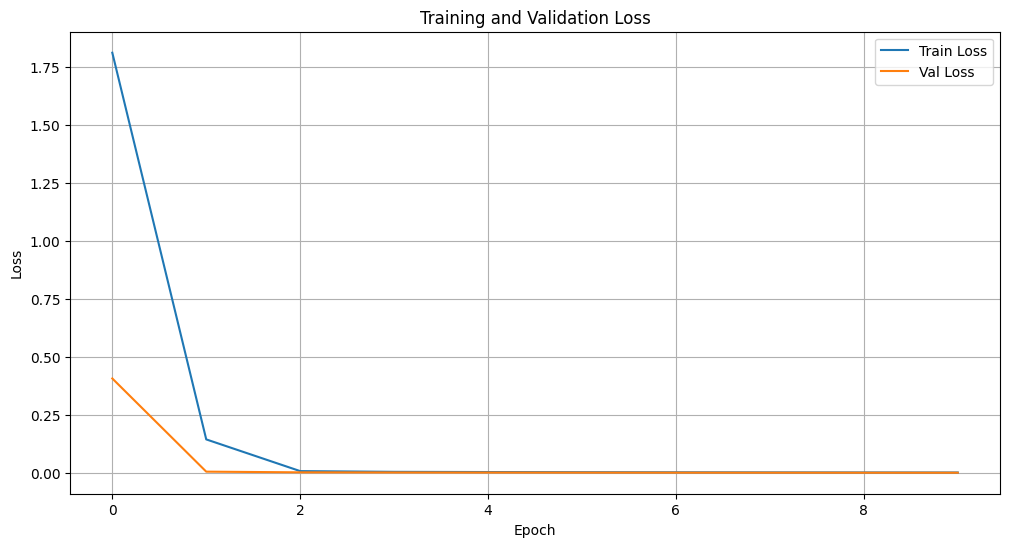

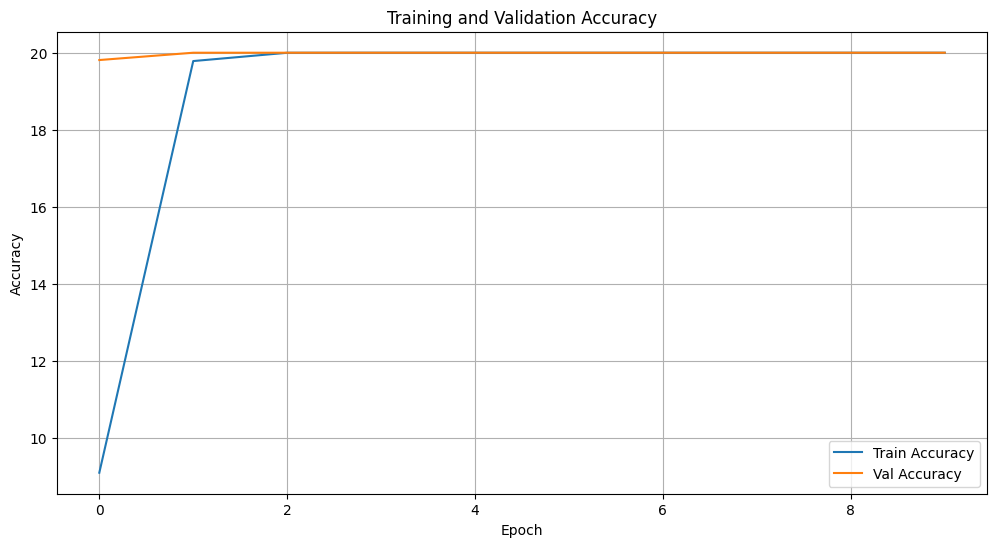

In [39]:
# Lists to store metrics over epochs
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training and evaluation loop
num_epochs = 10
for epoch in range(num_epochs):
    # Training Loop
    model.train()
    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    for inputs, targets in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch'):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.view(-1, ntoken), targets.view(-1))
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * len(inputs)

        _, predicted_labels = torch.max(outputs, dim=2)
        correct_predictions += (predicted_labels == targets).sum().item()
        total_samples += len(inputs)

    train_loss = total_loss / len(train_dataset)
    train_accuracy = correct_predictions / total_samples
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Validation Loop
    model.eval()
    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    with torch.no_grad():
        for inputs, targets in tqdm(val_loader, desc=f'Validation - Epoch {epoch+1}/{num_epochs}', unit='batch'):
            outputs = model(inputs)
            loss = criterion(outputs.view(-1, ntoken), targets.view(-1))
            total_loss += loss.item() * len(inputs)

            _, predicted_labels = torch.max(outputs, dim=2)
            correct_predictions += (predicted_labels == targets).sum().item()
            total_samples += len(inputs)

    val_loss = total_loss / len(val_dataset)
    val_accuracy = correct_predictions / total_samples
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    # Print progress
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}')

# Create DataFrame from metrics
metric_df = pd.DataFrame({
    'Train Loss': train_losses,
    'Val Loss': val_losses,
    'Train Accuracy': train_accuracies,
    'Val Accuracy': val_accuracies
})

# Plot the metrics
plt.figure(figsize=(12,6)) 
# Plot training and validation loss
plt.plot(metric_df['Train Loss'], label='Train Loss')
plt.plot(metric_df['Val Loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.grid(True)
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(12,6))
plt.plot(metric_df['Train Accuracy'], label='Train Accuracy')
plt.plot(metric_df['Val Accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.grid(True)
plt.legend()
plt.show()



In [41]:
X_tensor = torch.tensor([
    [10, 23, 45, 0, 0],  # Sequence 1 (padded to length 5)
    [5, 18, 32, 50, 12],  # Sequence 2
    [15, 8, 2, 0, 0],     # Sequence 3 (padded to length 5)
])

# Load the trained TransformerModel (model should be instantiated and trained beforehand)
# model = TransformerModel(ntoken, d_model, nhead, d_hid, nlayers, dropout)
# model.load_state_dict(torch.load('path_to_saved_model.pth'))  # Load model weights if saved

# Ensure model is in evaluation mode
model.eval()

# Pass input data through the model to obtain predictions
with torch.no_grad():
    output = model(X_tensor)

# Assuming output shape is [batch_size, num_classes]
# You can directly use argmax to get the index of the predicted class for each sequence
_, predicted_classes = torch.max(output, dim=1)

print(predicted_classes)

tensor([[0, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1,
         0, 1, 1, 0, 1, 2, 1, 2, 1, 2, 0, 3, 1, 2, 1, 0, 1, 2, 1, 2, 1, 3, 2, 2,
         0, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1,
         1, 1, 1, 2, 1, 1, 3, 1, 2, 1, 3, 1, 2, 3, 1, 1, 0, 1, 1, 3, 1, 1, 2, 1,
         2, 2, 0, 2],
        [1, 2, 3, 2, 3, 3, 4, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 3, 2, 2, 2, 2,
         4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 0, 3, 3, 2, 1, 2, 3, 2, 3, 2, 4, 3, 3,
         3, 3, 3, 3, 3, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 2, 2, 2, 2, 3, 2,
         2, 2, 2, 3, 2, 2, 4, 2, 3, 2, 0, 2, 3, 3, 0, 2, 4, 1, 2, 4, 2, 2, 3, 2,
         3, 3, 0, 3],
        [1, 2, 3, 2, 3, 1, 0, 0, 4, 2, 1, 1, 2, 4, 4, 4, 2, 4, 3, 0, 1, 4, 4, 2,
         4, 0, 2, 4, 1, 0, 4, 1, 1, 0, 4, 0, 2, 0, 0, 1, 4, 1, 2, 0, 1, 4, 0, 4,
         0, 0, 3, 2, 0, 0, 0, 1, 2, 0, 2, 4, 1, 2, 1, 1, 3, 1, 0, 4, 0, 1, 3, 4,
         2, 2, 0, 0, 1, 1, 1, 2, 0, 1, 2, 1, 0, 3, 0, 1, 0, 0, 1,